<h1>PROJET ECOMMERCE

<h2> ToC

***

**[1. Preparation et Nettoyage](#heading--1)**

  * [Chargement des données](#Chargement)
  * [Les données manquantes](#Manquantes)
  * [Les données dupliquées](#Dupliquées)
  * [Types de données](#Type)
  * [Fonction de nettoyage](#Nettoyage)
  * [Creation du master](#Master)

**[2. Analyse Exploratoire](#EDA)**

**[3. Feature Engineering](#Customer_ID)**

**[4. Transformation pour ML](#Transformation)**

  * [2.1. PCA sur product category](#PCA)
  * [2.2. Scaling des features numériques](#Scaling)
  * [2.3. Export](#Export)

***

<a name="Chargement"></a>
<h1>Chargement des données

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from random import sample
from folium.plugins import HeatMap
from EDA_utils import *
from matplotlib.gridspec import GridSpec
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

In [281]:
filepath_1 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_customers_dataset.csv"
filepath_2 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_geolocation_dataset.csv"
filepath_3 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_order_items_dataset.csv"
filepath_4 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_order_payments_dataset.csv"
filepath_5 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_order_reviews_dataset.csv"
filepath_6 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_orders_dataset.csv"
filepath_7 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_products_dataset.csv"
filepath_8 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/olist_sellers_dataset.csv"
filepath_9 = "/Users/efkanturedi/Corteze/my_py3/03_E_commerce/Input/product_category_name_translation.csv"


#filepath_1 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_customers_dataset.csv"
#filepath_2 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_geolocation_dataset.csv"
#filepath_3 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_order_items_dataset.csv"
#filepath_4 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_order_payments_dataset.csv"
#filepath_5 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_order_reviews_dataset.csv"
#filepath_6 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_orders_dataset.csv"
#filepath_7 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_products_dataset.csv"
#filepath_8 = "/home/et/Mytest/my_py3/03_E_commerce/Input/olist_sellers_dataset.csv"
#filepath_9 = "/home/et/Mytest/my_py3/03_E_commerce/Input/product_category_name_translation.csv"



In [282]:
customers = pd.read_csv(filepath_1);
geolocation = pd.read_csv(filepath_2)
order_items = pd.read_csv(filepath_3);
order_payments = pd.read_csv(filepath_4)
order_reviews = pd.read_csv(filepath_5)
orders = pd.read_csv(filepath_6)
products = pd.read_csv(filepath_7)
sellers = pd.read_csv(filepath_8)
product_category_name_translation = pd.read_csv(filepath_9)

In [283]:
customersX = customers.copy(deep=True);
geolocationX = geolocation.copy(deep=True)
order_itemsX = order_items.copy(deep=True)
order_paymentsX = order_payments.copy(deep=True)
order_reviewsX = order_reviews.copy(deep=True)
ordersX = orders.copy(deep=True)
productsX = products.copy(deep=True)
sellersX = sellers.copy(deep=True)
product_category_name_translationX = product_category_name_translation.copy(deep=True)

In [284]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [285]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [286]:
len(geolocation[['geolocation_lng','geolocation_lat']])

1000163

In [287]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [288]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [289]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [290]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [291]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [292]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [293]:
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Mettons nos données dans une liste afin de pouvoir faire des loop par dessus

In [294]:
liste_db = [
  customersX,
  geolocationX,
  order_itemsX,
  order_paymentsX,
  order_reviewsX,
  ordersX,
  productsX,
  sellersX,
  product_category_name_translationX
]

<a name="Manquantes"></a>
<h1>Les données Manquantes

Regardons le nombre de NaNs dans nos fichiers CSV

In [295]:
for item in liste_db:
  print(item.isna().sum().sum())

0
0
0
0
146532
4908
2448
0
0


3 de nos fichiers ont des NaNs: *order_reviews*, *orders* et *products*

Regardons plus attentivement les sources de ces données manquantes dans chacuns de ces fichiers

In [296]:
order_reviewsX.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [297]:
ordersX.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [298]:
productsX.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

<h1>Les données dupliquées
<a name="Dupliquées"></a>

In [299]:
for item in liste_db:
  print(item.duplicated().sum())

0
261831
0
0
0
0
0
0
0


In [300]:
geolocationX[geolocationX.duplicated()].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
10552,1309,-23.557324,-46.656929,sao paulo,SP
797497,74371,-16.728537,-49.348523,goiania,GO
478439,24435,-22.825976,-43.070608,sao goncalo,RJ
136713,5623,-23.599621,-46.727812,sao paulo,SP
280969,12620,-22.614119,-45.182194,piquete,SP
50095,3222,-23.583866,-46.562633,sao paulo,SP
464033,23025,-22.990713,-43.606698,rio de janeiro,RJ
867155,84030,-25.089864,-50.076704,ponta grossa,PR
219572,9070,-23.647649,-46.553255,santo andre,SP
63105,3641,-23.530299,-46.533625,sao paulo,SP


Pas de quoi s'inquiéter sur ce côté là

<h1>Types des données
<a name="Type">

In [301]:
df_titles = [
  'customers',
  'geolocation',
  'order_items',
  'order_payments',
  'order_reviews',
  'orders',
  'products',
  'sellers',
  'product_category_name_translation'
]

In [302]:
idxes = []
cols = []
types = []
uniques = []
counter=0
for df in liste_db:
    for col in df.columns:
        idxes.append(df_titles[counter])
        cols.append(col)
        types.append(df[col].dtype)
        uniques.append(df[col].nunique())
    counter+=1
full_data_labels = pd.DataFrame([idxes, 
                            cols, 
                            types, 
                            uniques]
                          ).T
full_data_labels.columns=['Indexes', 'Columns', 'Types', 'Unique vals']
full_data_labels

,Indexes,Columns,Types,Unique vals
0,customers,customer_id,object,99441
1,customers,customer_unique_id,object,96096
2,customers,customer_zip_code_prefix,int64,14994
3,customers,customer_city,object,4119
4,customers,customer_state,object,27
5,geolocation,geolocation_zip_code_prefix,int64,19015
6,geolocation,geolocation_lat,float64,717360
7,geolocation,geolocation_lng,float64,717613
8,geolocation,geolocation_city,object,8011
9,geolocation,geolocation_state,object,27


<h1>Fonctions utils pour nettoyage
<a name="Nettoyage">

In [303]:
ordersX['order_approved_at'].fillna('N/A', inplace=True)
ordersX['order_delivered_carrier_date'].fillna('N/A', inplace=True)
ordersX['order_delivered_customer_date'].fillna('N/A', inplace=True)

In [304]:
ordersX.duplicated().sum()

0

In [305]:
geolocationX.drop_duplicates(inplace=True)
geolocationX['customer_zip_code_prefix'] = geolocationX['geolocation_zip_code_prefix']

In [306]:
order_reviewsX['review_comment_title'].fillna('None',inplace=True)
order_reviewsX['review_comment_message'].fillna('None',inplace=True)

In [307]:
productsX['product_category_name'].fillna('Unknown',inplace=True)
productsX['product_name_lenght'].fillna(0, inplace=True)
productsX['product_description_lenght'].fillna(0,inplace=True)
productsX['product_photos_qty'].fillna(0, inplace=True)
productsX['product_weight_g'].fillna(0, inplace=True)
productsX['product_length_cm'].fillna(0, inplace=True)
productsX['product_height_cm'].fillna(0, inplace=True)
productsX['product_width_cm'].fillna(0, inplace=True)

In [308]:
order_itemsX['shipping_limit_date'] = order_itemsX['shipping_limit_date'].astype('datetime64')
ordersX['order_purchase_timestamp'] = ordersX['order_purchase_timestamp'].astype('datetime64')
ordersX['order_approved_at'] = pd.to_datetime(ordersX['order_approved_at'], errors='coerce')
ordersX['order_delivered_carrier_date'] = pd.to_datetime(ordersX['order_delivered_carrier_date'], errors='coerce')
ordersX['order_delivered_customer_date'] = pd.to_datetime(ordersX['order_delivered_customer_date'], errors='coerce')
ordersX['order_estimated_delivery_date'] = ordersX['order_estimated_delivery_date'].astype('datetime64')

In [309]:
products_local = pd.merge(productsX, product_category_name_translationX).drop(['product_category_name'], axis=1)

In [310]:
for item in liste_db:
  print(item.isna().sum().sum())

0
0
0
0
0
4908
0
0
0


<h1>Creation d'un fichier master
<a name="Master">

On va essayer de résoudre notre problème de jointure via Pandas. L'idée est de créer une grande base de données utilisable.

In [311]:
master_df = ordersX.merge(order_itemsX,on='order_id',how='left')
master_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [312]:
master_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [313]:
master_df = order_paymentsX.merge(master_df,on='order_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118426,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31
118427,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80
118428,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,1.0,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78
118429,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24,1.0,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54


In [314]:
master_df.isna().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
dtype: int64

In [315]:
master_df = master_df.merge(order_reviewsX, on='order_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08
119144,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80,f78d2909c6c202d3cabb8bac3fc00e75,5,None,None,2017-08-24 00:00:00,2017-08-25 19:38:31
119145,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,1.0,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78,2cdb88f8dce688bb85e20a5cf069e589,1,None,None,2017-12-07 00:00:00,2017-12-07 09:00:59
119146,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24,1.0,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54,6c698e5d193ab18db7615ea75a28866e,5,None,None,2018-08-22 00:00:00,2018-08-23 15:29:34


In [316]:
master_df = master_df.merge(customersX, on='customer_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP
119144,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80,f78d2909c6c202d3cabb8bac3fc00e75,5,None,None,2017-08-24 00:00:00,2017-08-25 19:38:31,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
119145,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaT,NaT,2017-12-05,1.0,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78,2cdb88f8dce688bb85e20a5cf069e58

In [317]:
master_df = master_df.merge(productsX,on='product_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,13450.0,95.0,30.0,20.0
119144,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12,1.0,fb55982be901439613a9594

In [318]:
master_df = master_df.merge(sellersX,on='seller_id',how='left')
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04,1.0,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,None,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,13450.0,95.0,30.0,20.0,15081.0,sao jose do rio preto,SP
119144,7b905861d7c825891d63

In [319]:
original_names = list(product_category_name_translationX['product_category_name'])
replacer = list(product_category_name_translationX['product_category_name_english'])

master_df['product_category_name'].replace(original_names,replacer,inplace=True)

In [320]:
master_df1 = master_df[master_df.isna().any(axis=1)]


In [321]:
master_df1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
40,5d9c5817e278892b7498d90bfa28ade8,1,credit_card,2,290.16,b583a7efe4522c8ce8942bd47f33d487,canceled,2018-04-26 08:13:54,2018-04-26 08:32:52,NaT,NaT,2018-05-10,1.0,f6dc856631040b5a7843b14a94b09b96,340636a908b13bbe0f4fb63fbe1d0c03,2018-05-03 08:31:17,110.90,34.18,d7aab6a7134b55c71503d87cb1bf2206,1,Cade meu PEDIDO ???,"No pedido esta como cancelado confome pedido, ...",2018-05-12 00:00:00,2018-05-12 15:29:59,67a7e94ec59ef6d6ba83942c81d39b9a,3420,sao paulo,SP,pet_shop,48.0,1594.0,1.0,15550.0,47.0,32.0,62.0,12240.0,sao jose dos campos,SP
41,5d9c5817e278892b7498d90bfa28ade8,1,credit_card,2,290.16,b583a7efe4522c8ce8942bd47f33d487,canceled,2018-04-26 08:13:54,2018-04-26 08:32:52,NaT,NaT,2018-05-10,2.0,f6dc856631040b5a7843b14a94b09b96,340636a908b13bbe0f4fb63fbe1d0c03,2018-05-03 08:31:17,110.90,34.18,d7aab6a7134b55c71503d87cb1bf2206,1,Cade meu PEDIDO ???,"No pedido esta como cancelado confome pedido, ...",2018-05-12 00:00:00,2018-05-12 15:29:59,67a7e94ec59ef6d6ba83942c81d39b9a,3420,sao paulo,SP,pet_shop,48.0,1594.0,1.0,15550.0,47.0,32.0,62.0,12240.0,sao jose dos campos,SP
62,afef48d3c8a0b1b7c9b7f8f922fb5674,1,credit_card,5,153.41,65f09de0b77ca07963fde8601c6be1fb,invoiced,2017-11-10 16:27:32,2017-11-10 16:50:47,NaT,NaT,2017-12-06,1.0,31945c8811d04df20bf86224210b4084,48436dade18ac8b2bce089ec2a041202,2017-11-17 16:50:47,134.90,18.51,dfaf49a4644a9b5afcc050667c3d2255,1,None,None,2017-12-08 00:00:00,2017-12-12 01:50:24,a56a69b5c5e0e105c671353ee9caa01a,96600,cangucu,RS,cool_stuff,48.0,919.0,5.0,900.0,40.0,17.0,18.0,27277.0,volta redonda,SP
82,c108072ab31ec90a754129c171577f5f,1,credit_card,4,210.82,a979b3cbd898fd8be91a290a667fd0d4,shipped,2017-10-16 21:13:03,2017-10-16 21:28:13,2017-10-26 20:40:20,NaT,2017-10-26,1.0,c744b9538213403285c97c9f7a53776f,70a12e78e608ac31179aea7f8422044b,2017-10-20 21:28:13,200.00,10.82,862324f9389340127caee01ac58c2103,1,None,Recebi uma ligação do vendedor falando que o p...,2017-10-28 00:00:00,2017-10-28 10:27:46,741996aa586218efdc5169365507510d,12247,sao jose dos campos,SP,health_beauty,40.0,779.0,3.0,1000.0,31.0,5.0,15.0,12327.0,jacarei,SP
87,947e9c6bfd83a06953c420ef92d3da6e,1,voucher,1,69.46,2737211835d5ea370af15ee145f7840c,canceled,2018-08-15 15:13:32,NaT,NaT,NaT,2018-08-28,NaN,NaN,NaN,NaT,NaN,NaN,75409037b6d31b5c0a20df9980bf108b,4,recomendo sim,"o produto apresentou defeito, mas assistência ...",2018-08-15 00:00:00,2018-08-16 15:05:25,a2ac4c64994786e12db70e1782d2bfef,4753,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119067,974f9f87a3bad01b2ac72fe987505e9b,1,credit_card,3,91.18,b8bd03cdd075b29c82a9c55e5cd8e224,unavailable,2017-06-09 20:25:03,2017-06-09 20:35:17,NaT,NaT,2017-08-01,NaN,NaN,NaN,NaT,NaN,NaN,4f8843fd61eb8d08e9e3a1d2e000cc79,1,None,Enviei 3 e-mails sobre esta reclamação e vcs n...,2017-08-03 00:00:00,2017-08-03 03:55:04,e075305a11bf4cc09e8395bd97266a1e,38183,araxa,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119095,8da21fa53a570d0624c7a5d0c14c617a,1,credit_card,10,252.68,df7338a04458506a3b2f23056c466e88,shipped,2017-06-07 17:02:27,2017-06-07 17:10:20,2017-06-09 12:03:00,NaT,2017-06-28,1.0,f76b8eae9da79861cd75f86a1020879e,94e93ce877be27a515118db

In [322]:
master_df1['order_status'].value_counts()
# On comprends ici NaN que nous avons dans notre tableau correspondent aux commandes qui ont été annulé, ou autre. Donc à enlever. 

shipped        1256
canceled        743
unavailable     652
invoiced        378
processing      376
delivered        24
created           5
approved          3
Name: order_status, dtype: int64

In [323]:
master_df = master_df.dropna()
master_df.reset_index(drop=True,inplace=True)
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,home_construction,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,auto,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115706,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12,1.0,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14,9d099d7c7c6f2e00167890928d37c5c7,5,None,None,2018-05-23 00:00:00,2018-05-28 18:52:37,13f283df2f4760f22b57830865761d07,85869,foz do iguacu,PR,toys,35.0,537.0,2.0,7400.0,45.0,29.0,53.0,18500.0,tatui,SP
115707,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc0561

In [324]:
master_df['product_category_name'].unique()

array(['home_construction', 'auto', 'perfumery', 'bed_bath_table',
       'housewares', 'art', 'sports_leisure', 'furniture_living_room',
       'garden_tools', 'electronics', 'signaling_and_security',
       'cool_stuff', 'watches_gifts', 'baby', 'furniture_decor',
       'construction_tools_lights', 'health_beauty', 'office_furniture',
       'consoles_games', 'home_appliances', 'telephony', 'toys',
       'pet_shop', 'stationery', 'books_general_interest',
       'computers_accessories', 'small_appliances',
       'fashion_bags_accessories', 'costruction_tools_garden',
       'musical_instruments', 'christmas_supplies', 'Unknown',
       'luggage_accessories', 'construction_tools_construction',
       'costruction_tools_tools', 'market_place', 'food_drink',
       'home_confort', 'fixed_telephony', 'audio', 'air_conditioning',
       'home_appliances_2', 'fashion_sport',
       'kitchen_dining_laundry_garden_furniture',
       'construction_tools_safety', 'food',
       'industry_co

In [325]:
master_df['product_category_name'].replace(['Unknown','portateis_cozinha_e_preparadores_de_alimentos'],'Other',inplace=True)


In [326]:
master_df['product_category_name'].unique()

array(['home_construction', 'auto', 'perfumery', 'bed_bath_table',
       'housewares', 'art', 'sports_leisure', 'furniture_living_room',
       'garden_tools', 'electronics', 'signaling_and_security',
       'cool_stuff', 'watches_gifts', 'baby', 'furniture_decor',
       'construction_tools_lights', 'health_beauty', 'office_furniture',
       'consoles_games', 'home_appliances', 'telephony', 'toys',
       'pet_shop', 'stationery', 'books_general_interest',
       'computers_accessories', 'small_appliances',
       'fashion_bags_accessories', 'costruction_tools_garden',
       'musical_instruments', 'christmas_supplies', 'Other',
       'luggage_accessories', 'construction_tools_construction',
       'costruction_tools_tools', 'market_place', 'food_drink',
       'home_confort', 'fixed_telephony', 'audio', 'air_conditioning',
       'home_appliances_2', 'fashion_sport',
       'kitchen_dining_laundry_garden_furniture',
       'construction_tools_safety', 'food',
       'industry_comm

In [327]:
zips = master_df['customer_zip_code_prefix']
geol = geolocationX.groupby(['customer_zip_code_prefix'],as_index=False).agg({
  'geolocation_lat':'mean',
  'geolocation_lng':'mean'
})

In [328]:
geol

,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343920,-51.874988
19013,99980,-28.389500,-51.843122


In [329]:
master_df = master_df.merge(geol,how='left',on='customer_zip_code_prefix')

In [330]:
master_df.isna().sum()

order_id                           0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_id                          0
review_score                       0
review_comment_title               0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
c

In [331]:
master_df2 = master_df[master_df.isna().any(axis=1)]
master_df2

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
1237,05ddf4cc62efcc6f34b8c693eaa2db01,1,credit_card,4,88.58,b77ee5671feb9b6efce84cc804842024,delivered,2018-07-03 18:18:34,2018-07-05 16:26:57,2018-07-04 14:51:00,2018-07-09 16:34:28,2018-07-25,1.0,24c9d329963373e2fccaa3f3204db19e,7299e27ed73d2ad986de7f7c77d919fa,2018-07-06 10:31:18,69.99,18.59,fb837deb43044179a59c4f70b62d331e,5,None,None,2018-07-10 00:00:00,2018-07-10 22:28:34,5c64fc047d4115cc4be24c9c0c9503c2,73088,brasilia,DF,consoles_games,58.0,601.0,2.0,100.0,21.0,24.0,23.0,38440.0,araguari,MG,NaN,NaN
1289,edf5259d2b67344bab205bdd705eb9f8,1,credit_card,4,113.16,d0de9a1f4f99b1ef24d62e647e0e2320,delivered,2018-08-19 17:22:42,2018-08-20 12:30:29,2018-08-21 11:48:00,2018-08-27 16:25:24,2018-09-04,1.0,94eecc7cef7bc0bb31e2c26526efdd0a,cc5a78bbad32776dc4e3af205218368c,2018-08-22 12:30:29,68.88,44.28,f64356c65d4433fb775be5bd4a0d7c26,5,OTIMO... ENTREGA RAPIDISS,None,2018-08-28 00:00:00,2018-08-29 02:10:29,339f34206b47320a2fce8cb2197e13cb,71993,brasilia,DF,housewares,53.0,1274.0,1.0,6050.0,35.0,12.0,55.0,35501.0,divinopolis,MG,NaN,NaN
1567,b99a2fee4c6c76f8f22757566c90d534,1,voucher,1,44.60,d42a85a7f08524cec83afa0a1127054d,delivered,2018-02-27 21:52:11,2018-02-27 22:08:29,2018-03-01 22:36:39,2018-03-14 01:33:02,2018-03-20,1.0,aa280035c50ba62c746480a59045eec4,fa40cc5b934574b62717c68f3d678b6d,2018-03-05 22:08:29,30.50,14.10,e59f6482d37feb7beb8f89c29102d239,5,None,None,2018-03-15 00:00:00,2018-03-15 18:29:24,a3057829f96dc368f93a30abda21c970,72300,brasilia,DF,toys,56.0,678.0,3.0,200.0,16.0,8.0,11.0,2310.0,sao paulo,SP,NaN,NaN
1787,7ebe19943d85e81a7b0eb108681276b7,1,credit_card,8,211.94,fa3a8736d5ae8f7df9b0a4154d0b14dc,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,1.0,9d32095f76b97762307e86cfc18dd7a0,391fc6631aebcf3004804e51b40bcf1e,2018-08-01 09:03:37,49.95,19.13,f1545eeb179b7b09e9906bcef236f8c6,5,Bonito... Gostei da compr,None,2018-08-01 00:00:00,2018-08-02 14:09:57,2de521d3fd097acfbd5bed9c7b9ed0d0,71551,brasilia,DF,bed_bath_table,38.0,213.0,2.0,400.0,25.0,9.0,19.0,14940.0,ibitinga,SP,NaN,NaN
1788,7ebe19943d85e81a7b0eb108681276b7,1,credit_card,8,211.94,fa3a8736d5ae8f7df9b0a4154d0b14dc,delivered,2018-07-22 10:28:14,2018-07-23 11:31:43,2018-07-23 10:09:00,2018-07-26 16:42:42,2018-08-15,2.0,87d780fa7d2cf3710aa02dc4ca8db985,da8622b14eb17ae2831f4ac5b9dab84a,2018-07-26 09:03:37,119.90,22.96,f1545eeb179b7b09e9906bcef236f8c6,5,Bonito... Gostei da compr,None,2018-08-01 00:00:00,2018-08-02 14:09:57,2de521d3fd097acfbd5bed9c7b9ed0d0,71551,brasilia,DF,bed_bath_table,57.0,189.0,1.0,1350.0,46.0,2.0,36.0,13405.0,piracicaba,SP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113761,9cfa13a566f8072bb6af2c225db04e5f,1,boleto,1,57.23,eaa860ad37779a36680e93d7d2b8b040,delivered,2018-06-25 09:53:46,2018-06-26 19:04:13,2018-06-28 11:44:00,2018-07-05 20:13:32,2018-07-24,1.0,6db39def795b8e1cfff57328bb3869db,d91fb3b7d041e83b64a00a3edfb37e4f,2018-07-02 19:04:13,34.19,23.04,79b057fe934639ac76007de146f37988,4,None,None,2018-07-06 00:00:00,2018-07-08 23:09:27,3d528b069707b3464a19fd937fc9f06c,75257,senador canedo,GO,home_appliances,60.0,174.0,1.0,1550.0,65.0,7.0,38.0,1170

In [332]:
geo_hash = master_df.groupby('customer_state',as_index=False)
geo_hash = geo_hash.agg({
    'geolocation_lat':'mean',
    'geolocation_lng':'mean',
})

In [333]:
geo_hash

,customer_state,geolocation_lat,geolocation_lng
0,AC,-9.940908,-68.043663
1,AL,-9.636357,-36.052805
2,AM,-3.198464,-60.056560
3,AP,0.038680,-51.167226
4,BA,-13.022167,-39.439324
5,CE,-4.310180,-38.966381
6,DF,-15.809172,-47.976446
7,ES,-20.148297,-40.490957
8,GO,-16.613947,-49.329894
9,MA,-3.577111,-44.706294


In [334]:
zipbObj_lng = zip(geo_hash['customer_state'], geo_hash['geolocation_lng'])
Dict_lng = dict(zipbObj_lng)

zipbObj_lat = zip(geo_hash['customer_state'], geo_hash['geolocation_lat'])
Dict_lat = dict(zipbObj_lat)

master_df['geolocation_lat'].fillna(master_df['customer_state'].map(Dict_lat), inplace = True)
master_df['geolocation_lng'].fillna(master_df['customer_state'].map(Dict_lng), inplace = True)

In [335]:
master_df.isna().sum().sum()

0

In [336]:
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,home_construction,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP,-17.857908,-41.495395
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,auto,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP,-23.471961,-46.636782
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP,-23.457866,-46.656411
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,-21.741689,-43.335592
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,-21.741689,-43.335592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115706,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12,1.0,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14,9d099d7c7c6f2e00167890928d37c5c7,5,None,None,2018-05-23 00:00:00,2018-05-28 18:52:37,13f283df2f4760f22b57830865761d07,85869,fo

<h1>Analyse Exploratoire
<a name="EDA">

In [235]:
master_df_quant = master_df.drop(columns=['payment_installments', 'order_item_id','customer_zip_code_prefix','seller_zip_code_prefix'])

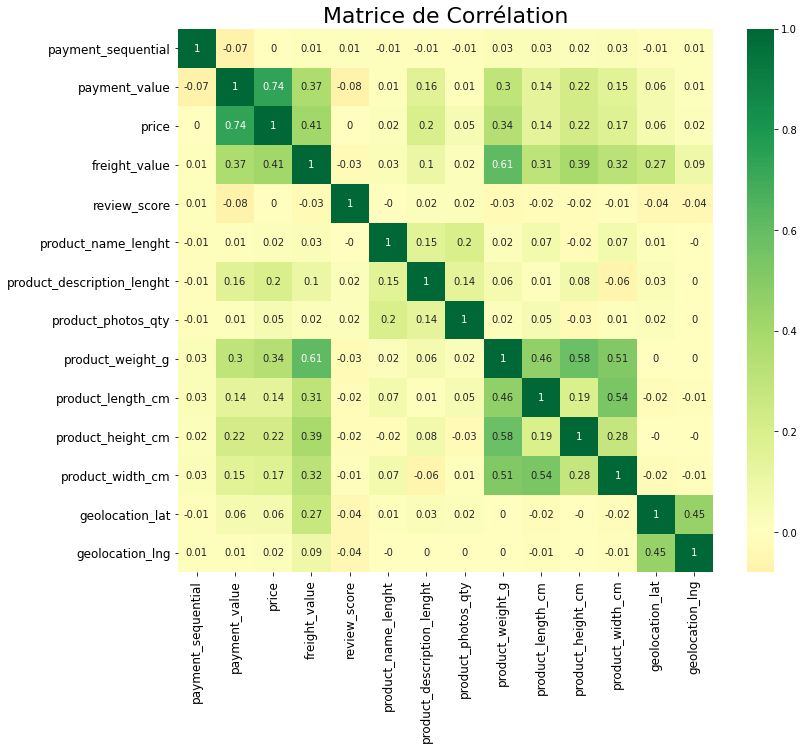

In [236]:
plt.figure(figsize=(12,10))
sns.heatmap(master_df_quant.corr().round(2), 
            xticklabels=master_df_quant.corr().columns, 
            yticklabels=master_df_quant.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)

plt.title('Matrice de Corrélation', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

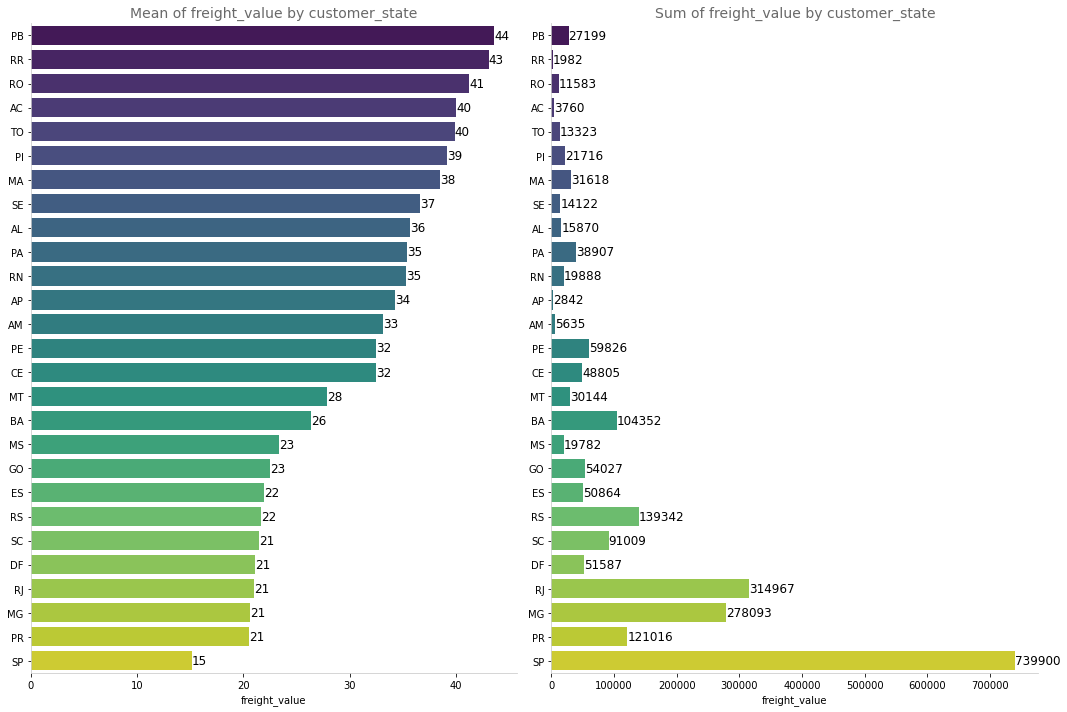

In [237]:
mean_sum_analysis(master_df, 'customer_state', 'freight_value', palette='viridis', figsize=(15, 10))

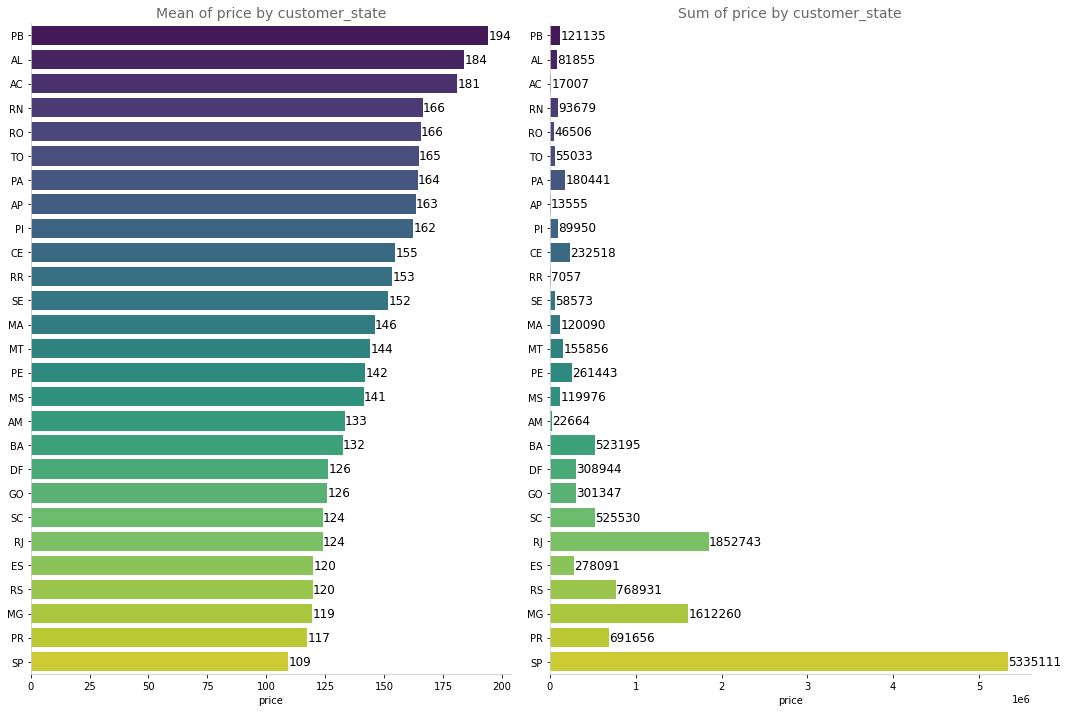

In [238]:
mean_sum_analysis(master_df, 'customer_state', 'price', palette='viridis', figsize=(15, 10))

In [239]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    master_df[col] = pd.to_datetime(master_df[col])
    
# Extracting attributes for purchase date - Year and Month
master_df['order_purchase_year'] = master_df['order_purchase_timestamp'].apply(lambda x: x.year)
master_df['order_purchase_month'] = master_df['order_purchase_timestamp'].apply(lambda x: x.month)
master_df['order_purchase_month_name'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
master_df['order_purchase_year_month'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
master_df['order_purchase_date'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
master_df['order_purchase_day'] = master_df['order_purchase_timestamp'].apply(lambda x: x.day)
master_df['order_purchase_dayofweek'] = master_df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
master_df['order_purchase_dayofweek_name'] = master_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
master_df['order_purchase_hour'] = master_df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
master_df['order_purchase_time_day'] = pd.cut(master_df['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
master_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,home_construction,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP,-17.857908,-41.495395,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,auto,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP,-23.471961,-46.636782,2018,6,Jun,201806,20180626,26,1,Tue,11,Morning
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP,-23.457866,-46.656411,2017,12,Dec,201712,20171212,12,1,Tue,11,Morning
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,-21.741689,-43.335592,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,-21.741689,-43.335592,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning


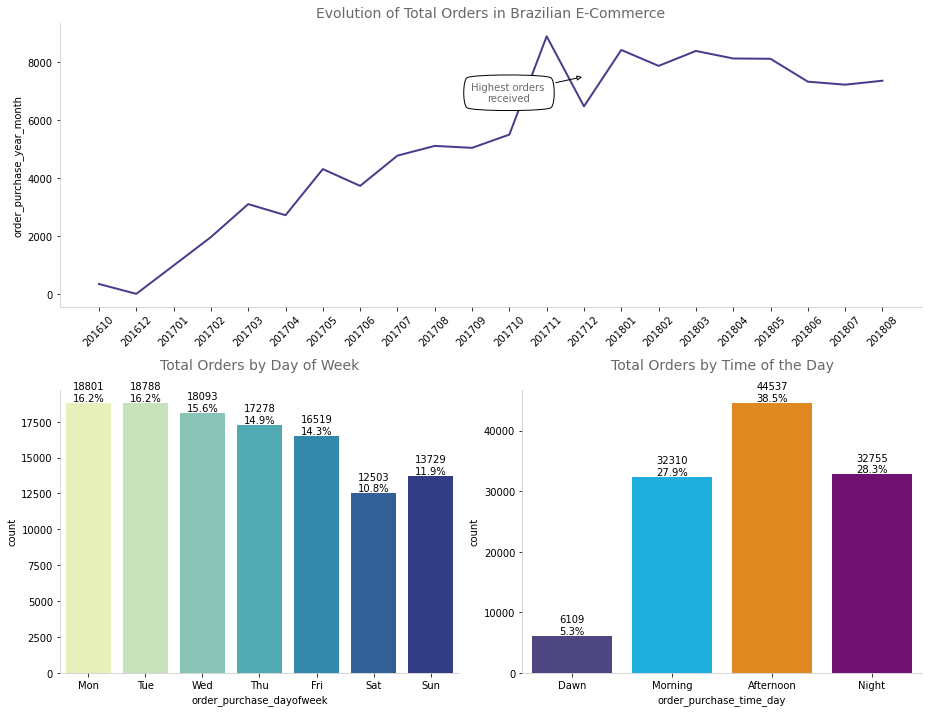

In [240]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=master_df['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
single_countplot(master_df, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(master_df, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

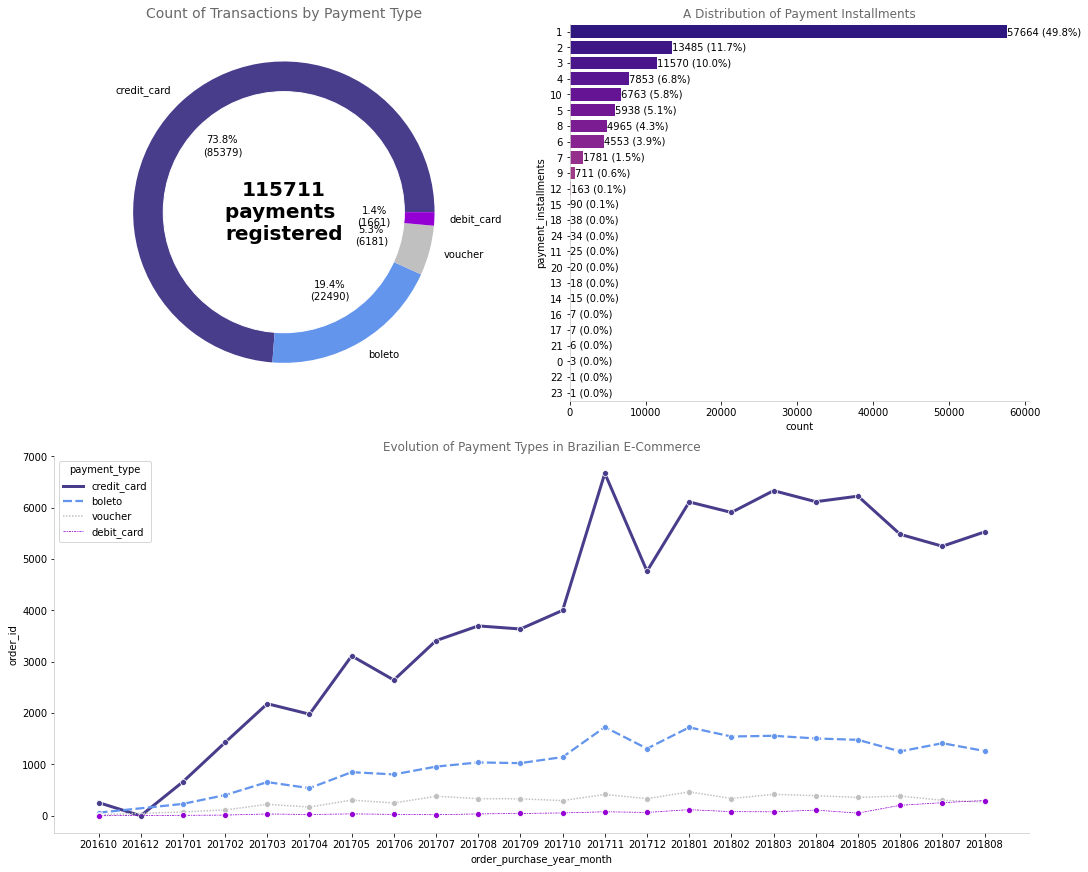

In [241]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plot 1 - Payment types in a donut chart
colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet']
label_names = master_df['payment_type'].value_counts().index
donut_plot(master_df, col='payment_type', ax=ax1, label_names=label_names, colors=colors,
           title='Count of Transactions by Payment Type', text=f'{len(master_df)}\npayments \nregistered')

# Plot 2 - Payment installments
single_countplot(master_df, ax=ax2, y='payment_installments')
ax2.set_title('A Distribution of Payment Installments', color='dimgrey', size=12)

# Plot 3 - Evolution of payment types
payment_evl = master_df.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax3, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')
format_spines(ax3, right_border=False)
ax3.set_title('Evolution of Payment Types in Brazilian E-Commerce', size=12, color='dimgrey')
plt.show()

In [242]:
# Grouping geolocation data for plotting a heatmap
heat_data = geolocationX.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Heat Map',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

#map1

In [243]:
master_df.shape

(115711, 51)

In [244]:
master_df = master_df.dropna(how='any')

In [245]:
master_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,home_construction,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321.0,salto,SP,-17.857908,-41.495395,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,None,None,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,auto,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660.0,sao paulo,SP,-23.471961,-46.636782,2018,6,Jun,201806,20180626,26,1,Tue,11,Morning
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,None,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015.0,santo andre,SP,-23.457866,-46.656411,2017,12,Dec,201712,20171212,12,1,Tue,11,Morning
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,None,None,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,-21.741689,-43.335592,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,None,None,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405.0,piracicaba,SP,-21.741689,-43.335592,2017,12,Dec,201712,20171206,6,2,Wed,12,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

<h2> Feature Engineering
<a name = "Customer_ID">

In [246]:
most_frequent = lambda x:x.mode()[0]
lister = lambda x:list(set(x))
lister_2 = lambda x:list(x)

In [247]:
customer_df = master_df.groupby([
  'customer_unique_id',
  'customer_state',
], as_index=False).agg({
  'payment_value': 'sum',
  'payment_type' : most_frequent,
  'product_category_name' : lister,
  'review_score': 'mean',
  'freight_value':'sum',
  'geolocation_lat':'mean',
  'geolocation_lng':'mean'
})

In [248]:
customer_df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,141.90,credit_card,[bed_bath_table],5.0,12.00,-23.340262,-46.831085
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,27.19,credit_card,[health_beauty],4.0,8.29,-23.559044,-46.788516
2,0000f46a3911fa3c0805444483337064,SC,86.22,credit_card,[stationery],3.0,17.22,-27.543010,-48.634938
3,0000f6ccb0745a6a4b88665a16c9f078,PA,43.62,credit_card,[telephony],4.0,17.63,-1.312726,-48.482748
4,0004aac84e0df4da2b147fca70cf8255,SP,196.89,credit_card,[telephony],5.0,16.89,-23.505588,-47.469820
...,...,...,...,...,...,...,...,...,...
93374,fffcf5a5ff07b0908bd4e2dbc735a684,PE,4134.84,credit_card,[health_beauty],5.0,497.42,-8.362654,-36.562103
93375,fffea47cd6d3cc0a88bd621562a9d061,BA,84.58,credit_card,[baby],4.0,19.69,-12.217900,-38.959237
93376,ffff371b4d645b6ecea244b27531430a,MT,112.46,credit_card,[auto],5.0,22.56,-11.834705,-55.508145
93377,ffff5962728ec6157033ef9805bacc48,ES,133.69,credit_card,[watches_gifts],5.0,18.69,-21.126170,-41.672396


In [249]:
customer_df.drop_duplicates(subset=['customer_unique_id'],inplace=True)
customer_df.reset_index(drop=True,inplace=True)
customer_df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,141.90,credit_card,[bed_bath_table],5.0,12.00,-23.340262,-46.831085
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,27.19,credit_card,[health_beauty],4.0,8.29,-23.559044,-46.788516
2,0000f46a3911fa3c0805444483337064,SC,86.22,credit_card,[stationery],3.0,17.22,-27.543010,-48.634938
3,0000f6ccb0745a6a4b88665a16c9f078,PA,43.62,credit_card,[telephony],4.0,17.63,-1.312726,-48.482748
4,0004aac84e0df4da2b147fca70cf8255,SP,196.89,credit_card,[telephony],5.0,16.89,-23.505588,-47.469820
...,...,...,...,...,...,...,...,...,...
93336,fffcf5a5ff07b0908bd4e2dbc735a684,PE,4134.84,credit_card,[health_beauty],5.0,497.42,-8.362654,-36.562103
93337,fffea47cd6d3cc0a88bd621562a9d061,BA,84.58,credit_card,[baby],4.0,19.69,-12.217900,-38.959237
93338,ffff371b4d645b6ecea244b27531430a,MT,112.46,credit_card,[auto],5.0,22.56,-11.834705,-55.508145
93339,ffff5962728ec6157033ef9805bacc48,ES,133.69,credit_card,[watches_gifts],5.0,18.69,-21.126170,-41.672396


<h2>Transformation pour ML
<a name = "Transformation">

In [250]:
selected_features = [
  'product_category_name',
]

In [251]:
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

In [252]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(customer_df['product_category_name'])
product_df = pd.DataFrame(mlb.fit_transform(customer_df['product_category_name']),
                   columns=mlb.classes_,
                   index=customer_df['product_category_name'].index)
product_df

,Other,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,pc_gamer,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93337,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93338,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<h2> PCA sur Product category
<a name="PCA">

In [253]:
from sklearn.decomposition import PCA
pca = PCA()

In [254]:
pca.fit(product_df)

PCA()

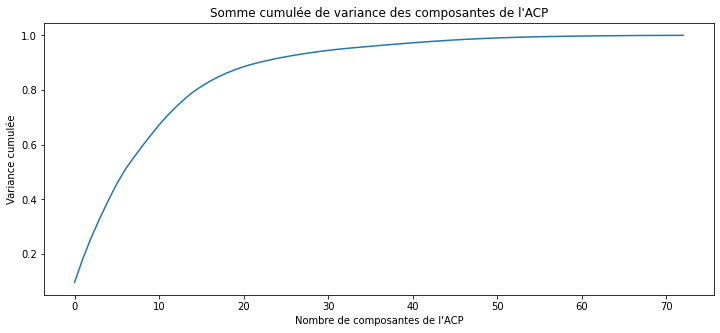

In [255]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(product_df.shape[1])),
         np.cumsum(pca.explained_variance_ratio_));

In [256]:
pca_opt = 15

np.cumsum(pca.explained_variance_ratio_)[pca_opt]

0.8133175941318829

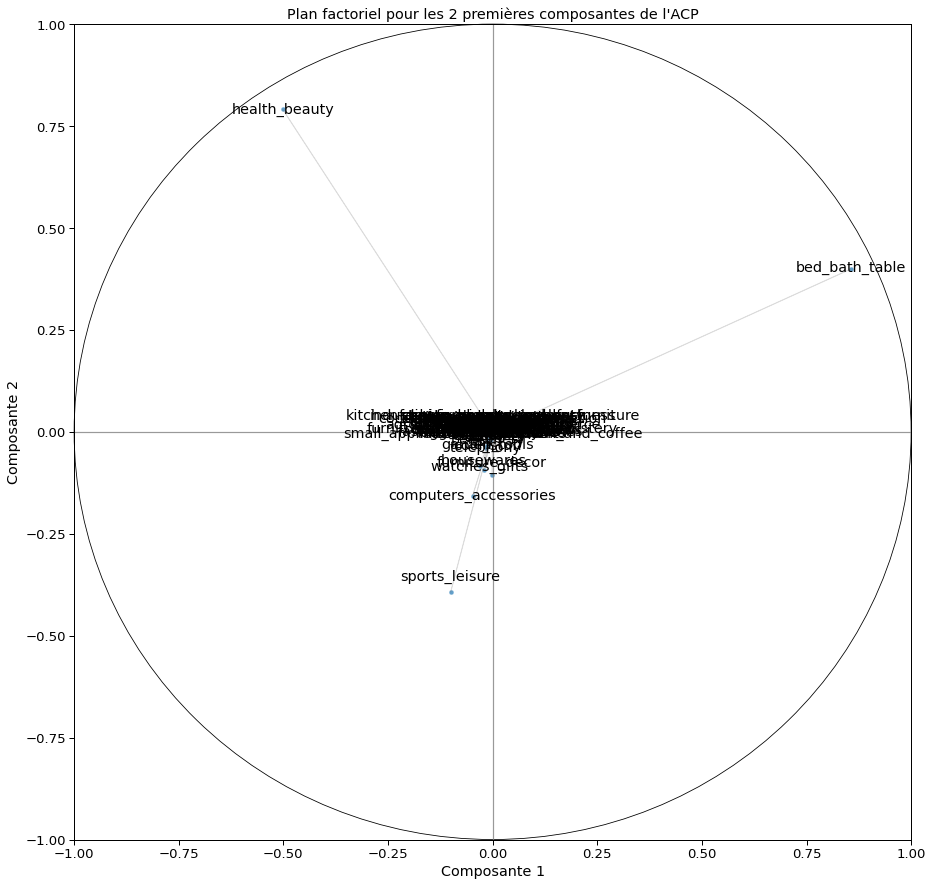

In [257]:
colonnes_pca = product_df.columns

from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1)

In [258]:
product_pca = pca.transform(product_df)[:,:pca_opt]

In [259]:
product_pca

array([[ 0.83749278,  0.35834058,  0.14309886, ..., -0.01334617,
        -0.00754329, -0.00718713],
       [-0.52056368,  0.74986693,  0.15419116, ..., -0.01073008,
        -0.01162263, -0.01094327],
       [-0.02608468, -0.05590305, -0.05173432, ...,  0.11406914,
         0.21134341,  0.90665367],
       ...,
       [-0.03165563, -0.0764357 , -0.07553536, ..., -0.0803735 ,
        -0.06458497, -0.04331912],
       [-0.04988482, -0.12586208, -0.14894729, ..., -0.02743477,
        -0.02741145, -0.02081753],
       [-0.03014731, -0.06329429, -0.05984948, ..., -0.36463677,
        -0.16903535, -0.09088126]])

In [260]:
x_show, y_show = product_pca[:,0],product_pca[:,1]

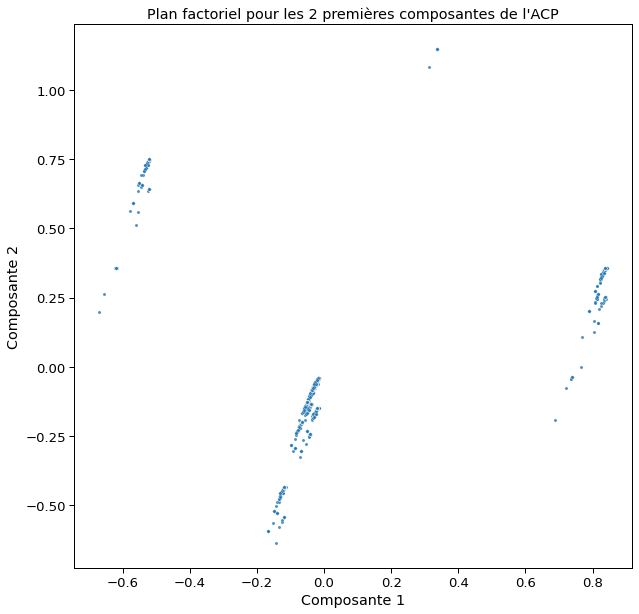

In [261]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

In [262]:
pca_labels =[]
n = product_pca.shape[1]

for x in range(n):
    pca_labels.append('pca_comp'+str(x))

In [263]:
product_pca_df = pd.DataFrame(product_pca, columns=pca_labels)

In [264]:
product_pca_df

,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12,pca_comp13,pca_comp14
0,0.837493,0.358341,0.143099,0.060319,0.029797,0.012406,0.062032,0.012884,0.000182,-0.010682,-0.005460,-0.012353,-0.013346,-0.007543,-0.007187
1,-0.520564,0.749867,0.154191,0.036222,0.058078,0.031399,0.081124,0.014441,0.000469,-0.012099,-0.007424,-0.018176,-0.010730,-0.011623,-0.010943
2,-0.026085,-0.055903,-0.051734,-0.020163,-0.044972,-0.028402,-0.124212,-0.042481,-0.004955,0.038741,0.033974,0.095662,0.114069,0.211343,0.906654
3,-0.034814,-0.081859,-0.083444,-0.029173,-0.085498,-0.066438,-0.442752,0.836703,-0.010257,-0.134980,-0.068456,-0.092887,-0.060119,-0.051837,-0.035532
4,-0.034814,-0.081859,-0.083444,-0.029173,-0.085498,-0.066438,-0.442752,0.836703,-0.010257,-0.134980,-0.068456,-0.092887,-0.060119,-0.051837,-0.035532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93336,-0.520564,0.749867,0.154191,0.036222,0.058078,0.031399,0.081124,0.014441,0.000469,-0.012099,-0.007424,-0.018176,-0.010730,-0.011623,-0.010943
93337,-0.023087,-0.061196,-0.058397,-0.025320,-0.051132,-0.031586,-0.160690,-0.067731,-0.016735,0.079939,0.036648,0.189756,0.864938,-0.357007,-0.127811
93338,-0.031656,-0.076436,-0.075535,-0.030553,-0.074995,-0.055374,-0.320835,-0.335125,0.719195,-0.401721,-0.145773,-0.133821,-0.080374,-0.064585,-0.043319
93339,-0.049885,-0.125862,-0.148947,-0.103308,-0.328705,-0.742299,0.467357,0.046128,0.001239,-0.031136,-0.019891,-0.036878,-0.027435,-0.027411,-0.020818


<h2> Scaling des features numériques
<a name = "Scaling">

In [265]:
numerics = [
  'payment_value',
  'review_score',
  'freight_value',
  'geolocation_lat',
  'geolocation_lng'
]

In [266]:
ss = StandardScaler()
customer_df_ss = customer_df.copy()
customer_df_ss[numerics] = ss.fit_transform(customer_df_ss[numerics])

In [267]:
customer_df_ss

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,-0.109922,credit_card,[bed_bath_table],0.665636,-0.467108,-0.385188,-0.158598
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,-0.287416,credit_card,[health_beauty],-0.108233,-0.602918,-0.424141,-0.148105
2,0000f46a3911fa3c0805444483337064,SC,-0.196078,credit_card,[stationery],-0.882101,-0.276022,-1.133464,-0.603268
3,0000f6ccb0745a6a4b88665a16c9f078,PA,-0.261994,credit_card,[telephony],-0.108233,-0.261013,3.536694,-0.565752
4,0004aac84e0df4da2b147fca70cf8255,SP,-0.024835,credit_card,[telephony],0.665636,-0.288102,-0.414623,-0.316054
...,...,...,...,...,...,...,...,...,...
93336,fffcf5a5ff07b0908bd4e2dbc735a684,PE,6.068458,credit_card,[health_beauty],0.665636,17.302417,2.281493,2.372823
93337,fffea47cd6d3cc0a88bd621562a9d061,BA,-0.198615,credit_card,[baby],-0.108233,-0.185604,1.595088,1.781902
93338,ffff371b4d645b6ecea244b27531430a,MT,-0.155476,credit_card,[auto],0.665636,-0.080543,1.663314,-2.297592
93339,ffff5962728ec6157033ef9805bacc48,ES,-0.122626,credit_card,[watches_gifts],0.665636,-0.222210,0.009019,1.113077


In [268]:
product_pca_df['customer_unique_id'] = customer_df_ss['customer_unique_id']

In [269]:
product_pca_df

,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12,pca_comp13,pca_comp14,customer_unique_id
0,0.837493,0.358341,0.143099,0.060319,0.029797,0.012406,0.062032,0.012884,0.000182,-0.010682,-0.005460,-0.012353,-0.013346,-0.007543,-0.007187,0000366f3b9a7992bf8c76cfdf3221e2
1,-0.520564,0.749867,0.154191,0.036222,0.058078,0.031399,0.081124,0.014441,0.000469,-0.012099,-0.007424,-0.018176,-0.010730,-0.011623,-0.010943,0000b849f77a49e4a4ce2b2a4ca5be3f
2,-0.026085,-0.055903,-0.051734,-0.020163,-0.044972,-0.028402,-0.124212,-0.042481,-0.004955,0.038741,0.033974,0.095662,0.114069,0.211343,0.906654,0000f46a3911fa3c0805444483337064
3,-0.034814,-0.081859,-0.083444,-0.029173,-0.085498,-0.066438,-0.442752,0.836703,-0.010257,-0.134980,-0.068456,-0.092887,-0.060119,-0.051837,-0.035532,0000f6ccb0745a6a4b88665a16c9f078
4,-0.034814,-0.081859,-0.083444,-0.029173,-0.085498,-0.066438,-0.442752,0.836703,-0.010257,-0.134980,-0.068456,-0.092887,-0.060119,-0.051837,-0.035532,0004aac84e0df4da2b147fca70cf8255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93336,-0.520564,0.749867,0.154191,0.036222,0.058078,0.031399,0.081124,0.014441,0.000469,-0.012099,-0.007424,-0.018176,-0.010730,-0.011623,-0.010943,fffcf5a5ff07b0908bd4e2dbc735a684
93337,-0.023087,-0.061196,-0.058397,-0.025320,-0.051132,-0.031586,-0.160690,-0.067731,-0.016735,0.079939,0.036648,0.189756,0.864938,-0.357007,-0.127811,fffea47cd6d3cc0a88bd621562a9d061
93338,-0.031656,-0.076436,-0.075535,-0.030553,-0.074995,-0.055374,-0.320835,-0.335125,0.719195,-0.401721,-0.145773,-0.133821,-0.080374,-0.064585,-0.043319,ffff371b4d645b6ecea244b27531430a
93339,-0.049885,-0.125862,-0.148947,-0.103308,-0.328705,-0.742299,0.467357,0.046128,0.001239,-0.031136,-0.019891,-0.036878,-0.027435,-0.027411,-0.020818,ffff5962728ec6157033ef9805bacc48


In [270]:
final_df = pd.merge(customer_df_ss,product_pca_df,on='customer_unique_id',how='left')

In [271]:
final_df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12,pca_comp13,pca_comp14
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,-0.109922,credit_card,[bed_bath_table],0.665636,-0.467108,-0.385188,-0.158598,0.837493,0.358341,0.143099,0.060319,0.029797,0.012406,0.062032,0.012884,0.000182,-0.010682,-0.005460,-0.012353,-0.013346,-0.007543,-0.007187
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,-0.287416,credit_card,[health_beauty],-0.108233,-0.602918,-0.424141,-0.148105,-0.520564,0.749867,0.154191,0.036222,0.058078,0.031399,0.081124,0.014441,0.000469,-0.012099,-0.007424,-0.018176,-0.010730,-0.011623,-0.010943
2,0000f46a3911fa3c0805444483337064,SC,-0.196078,credit_card,[stationery],-0.882101,-0.276022,-1.133464,-0.603268,-0.026085,-0.055903,-0.051734,-0.020163,-0.044972,-0.028402,-0.124212,-0.042481,-0.004955,0.038741,0.033974,0.095662,0.114069,0.211343,0.906654
3,0000f6ccb0745a6a4b88665a16c9f078,PA,-0.261994,credit_card,[telephony],-0.108233,-0.261013,3.536694,-0.565752,-0.034814,-0.081859,-0.083444,-0.029173,-0.085498,-0.066438,-0.442752,0.836703,-0.010257,-0.134980,-0.068456,-0.092887,-0.060119,-0.051837,-0.035532
4,0004aac84e0df4da2b147fca70cf8255,SP,-0.024835,credit_card,[telephony],0.665636,-0.288102,-0.414623,-0.316054,-0.034814,-0.081859,-0.083444,-0.029173,-0.085498,-0.066438,-0.442752,0.836703,-0.010257,-0.134980,-0.068456,-0.092887,-0.060119,-0.051837,-0.035532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93336,fffcf5a5ff07b0908bd4e2dbc735a684,PE,6.068458,credit_card,[health_beauty],0.665636,17.302417,2.281493,2.372823,-0.520564,0.749867,0.154191,0.036222,0.058078,0.031399,0.081124,0.014441,0.000469,-0.012099,-0.007424,-0.018176,-0.010730,-0.011623,-0.010943
93337,fffea47cd6d3cc0a88bd621562a9d061,BA,-0.198615,credit_card,[baby],-0.108233,-0.185604,1.595088,1.781902,-0.023087,-0.061196,-0.058397,-0.025320,-0.051132,-0.031586,-0.160690,-0.067731,-0.016735,0.079939,0.036648,0.189756,0.864938,-0.357007,-0.127811
93338,ffff371b4d645b6ecea244b27531430a,MT,-0.155476,credit_card,[auto],0.665636,-0.080543,1.663314,-2.297592,-0.031656,-0.076436,-0.075535,-0.030553,-0.074995,-0.055374,-0.320835,-0.335125,0.719195,-0.401721,-0.145773,-0.133821,-0.080374,-0.064585,-0.043319
93339,ffff5962728ec6157033ef9805bacc48,ES,-0.122626,credit_card,[watches_gifts],0.665636,-0.222210,0.009019,1.113077,-0.049885,-0.125862,-0.148947,-0.103308,-0.328705,-0.742299,0.467357,0.046128,0.001239,-0.031136,-0.019891,-0.036878,-0.027435,-0.027411,-0.020818


In [272]:
customer_df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,141.90,credit_card,[bed_bath_table],5.0,12.00,-23.340262,-46.831085
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,27.19,credit_card,[health_beauty],4.0,8.29,-23.559044,-46.788516
2,0000f46a3911fa3c0805444483337064,SC,86.22,credit_card,[stationery],3.0,17.22,-27.543010,-48.634938
3,0000f6ccb0745a6a4b88665a16c9f078,PA,43.62,credit_card,[telephony],4.0,17.63,-1.312726,-48.482748
4,0004aac84e0df4da2b147fca70cf8255,SP,196.89,credit_card,[telephony],5.0,16.89,-23.505588,-47.469820
...,...,...,...,...,...,...,...,...,...
93336,fffcf5a5ff07b0908bd4e2dbc735a684,PE,4134.84,credit_card,[health_beauty],5.0,497.42,-8.362654,-36.562103
93337,fffea47cd6d3cc0a88bd621562a9d061,BA,84.58,credit_card,[baby],4.0,19.69,-12.217900,-38.959237
93338,ffff371b4d645b6ecea244b27531430a,MT,112.46,credit_card,[auto],5.0,22.56,-11.834705,-55.508145
93339,ffff5962728ec6157033ef9805bacc48,ES,133.69,credit_card,[watches_gifts],5.0,18.69,-21.126170,-41.672396


<h2> Export
<a name = "Export">

In [273]:
filepath = '/Users/efkanturedi/Corteze/Python_output_folders/Ecommerce/'
final_df.to_csv(filepath+'final_df.csv',index=False)
customer_df.to_csv(filepath+'customer_df.csv',index=False)